In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from isolation import *

import matplotlib

In [2]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)
matplotlib.rc("legend", fontsize=16)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [3]:
filename='/eos/user/a/aperego/Timing/root_files/Zee/histo_Zee.root'
#filename='/eos/user/a/aperego/Timing/root_files/histo_Zee_noPU.root'
file = uproot.open(filename)

In [4]:
file.keys()

['mtdEleIsoNtupler;1',
 'mtdEleIsoNtupler/electrons;1',
 'mtdEleIsoNtupler/tracks;1',
 'mtdEleIsoNtupler/vertices;1']

In [5]:
electrons = file["mtdEleIsoNtupler/electrons"]
tracks = file["mtdEleIsoNtupler/tracks"]
vertices = file["mtdEleIsoNtupler/vertices"]

In [6]:
#tracks.keys()

In [7]:
NEVENTS = 9000

In [8]:
nEle = electrons['nEle'].array()[:NEVENTS]
ele_energy = electrons['ele_energy'].array()[:NEVENTS]
ele_pt = electrons['ele_pt'].array()[:NEVENTS]
ele_eta = electrons['ele_eta'].array()[:NEVENTS]
ele_phi = electrons['ele_phi'].array()[:NEVENTS]
ele_dz = electrons['ele_dz'].array()[:NEVENTS]
ele_dxy = electrons['ele_dxy'].array()[:NEVENTS]
ele_track = electrons['ele_track'].array()[:NEVENTS]
ele_barrel = electrons['ele_barrel'].array()[:NEVENTS]
ele_prompt = electrons['ele_prompt'].array()[:NEVENTS]
ele_time = electrons['ele_time'].array()[:NEVENTS]
ele_timeErr = electrons['ele_timeErr'].array()[:NEVENTS]
ele_mva = electrons['ele_mva'].array()[:NEVENTS]
sum_pT = electrons['sum_pT'].array()[:NEVENTS]
nTracks = electrons['nTracks'].array()[:NEVENTS]

In [9]:
# workaround!!
print(ak.max(ak.sum(ele_prompt, axis=1)), ele_prompt[ak.argmax(ak.sum(ele_prompt, axis=1))])
np.asarray(ele_prompt[ak.argmax(ak.sum(ele_prompt, axis=1))])[2] = False

3 [True, True, True, False]


In [10]:
ele_sim_pt = electrons['ele_sim_pt'].array()[:NEVENTS]
ele_sim_time = electrons['ele_sim_time'].array()[:NEVENTS]
track_sim_pt = tracks['track_sim_pt'].array()[:NEVENTS]
track_sim_time = tracks['track_sim_time'].array()[:NEVENTS]

In [11]:
track_pt = tracks['track_pt'].array()[:NEVENTS]
track_dt_ele = tracks['track_dt_ele'].array()[:NEVENTS]
track_dt_vtx = tracks['track_dt_vtx'].array()[:NEVENTS]
track_dz_ele = tracks['track_dz_ele'].array()[:NEVENTS]
track_PVweight = tracks['track_PVweight'].array()[:NEVENTS]
track_time = tracks['track_time'].array()[:NEVENTS]
track_timeErr = tracks['track_timeErr'].array()[:NEVENTS]
track_mva = tracks['track_mva'].array()[:NEVENTS]
track_gen_matched = tracks['track_gen_matched'].array()[:NEVENTS]

In [12]:
vertex_time = vertices['vertex_time'].array()[:NEVENTS]
vertex_timeErr = vertices['vertex_timeErr'].array()[:NEVENTS]
vertex_nTracks = vertices['vertex_NumberofTracks'].array()[:NEVENTS]
event = vertices['event'].array()[:NEVENTS]

In [13]:
for i in range(10):
    print(f'There are {nEle[i]} in the {i+1}° event of which {sum(ele_prompt[i])} prompt')

There are 5 in the 1° event of which 2 prompt
There are 7 in the 2° event of which 2 prompt
There are 10 in the 3° event of which 2 prompt
There are 21 in the 4° event of which 2 prompt
There are 9 in the 5° event of which 1 prompt
There are 4 in the 6° event of which 1 prompt
There are 20 in the 7° event of which 0 prompt
There are 8 in the 8° event of which 2 prompt
There are 8 in the 9° event of which 1 prompt
There are 15 in the 10° event of which 1 prompt


In [14]:
print(f'Number of events: {len(event)}')

Number of events: 9000


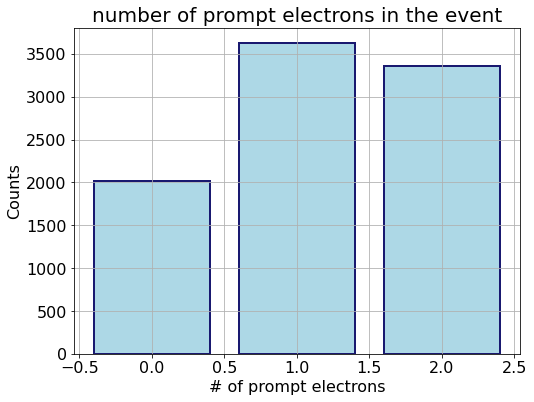

In [15]:
plt.figure(figsize=(8,6))
plt.hist(ak.sum(ele_prompt, axis=1), bins=3, range=(-0.5,2.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title("number of prompt electrons in the event")
plt.xlabel("# of prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

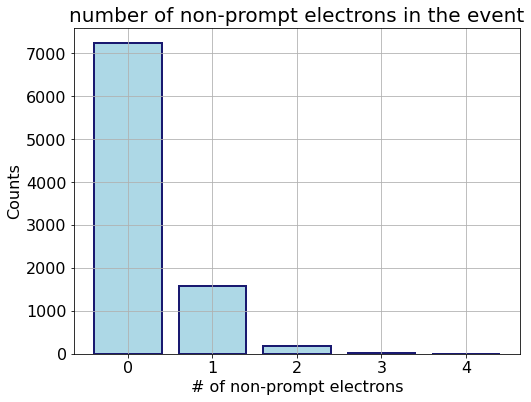

In [16]:
plt.figure(figsize=(8,6))
plt.hist(ak.count(ele_prompt, axis=1)-ak.sum(ele_prompt, axis=1), bins=5, range=(-0.5,4.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title("number of non-prompt electrons in the event")
plt.xlabel("# of non-prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

## pT distributions

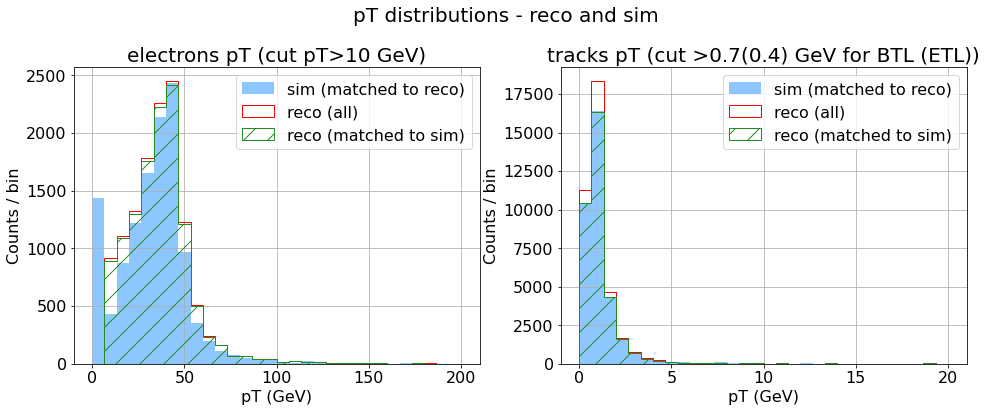

In [17]:
plt.figure(figsize=(16,12))
plt.suptitle("pT distributions - reco and sim", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ak.flatten(ele_sim_pt), bins=30, color='dodgerblue', label="sim (matched to reco)", alpha=0.5, range=(0,200))
plt.hist(ak.flatten(ele_pt), bins=30, color='red', label="reco (all)", histtype="step", range=(0,200))
plt.hist(ak.flatten(ele_pt[ele_sim_time != -1]), bins=30, color='forestgreen', label="reco (matched to sim)", histtype="step", range=(0,200), hatch='/')
plt.title("electrons pT (cut pT>10 GeV)")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
plt.hist(ak.flatten(ak.flatten(track_sim_pt)), bins=30, color='dodgerblue', label="sim (matched to reco)", alpha=0.5, range=(0,20))
plt.hist(ak.flatten(ak.flatten(track_pt)), bins=30, color='red', label="reco (all)", histtype="step", range=(0,20))
plt.hist(ak.flatten(ak.flatten(track_pt[track_sim_time != -1])), bins=30, color='forestgreen', label="reco (matched to sim)", histtype="step", range=(0,20), hatch='/')

plt.title("tracks pT (cut >0.7(0.4) GeV for BTL (ETL))")
plt.xlabel("pT (GeV)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

## time distribution

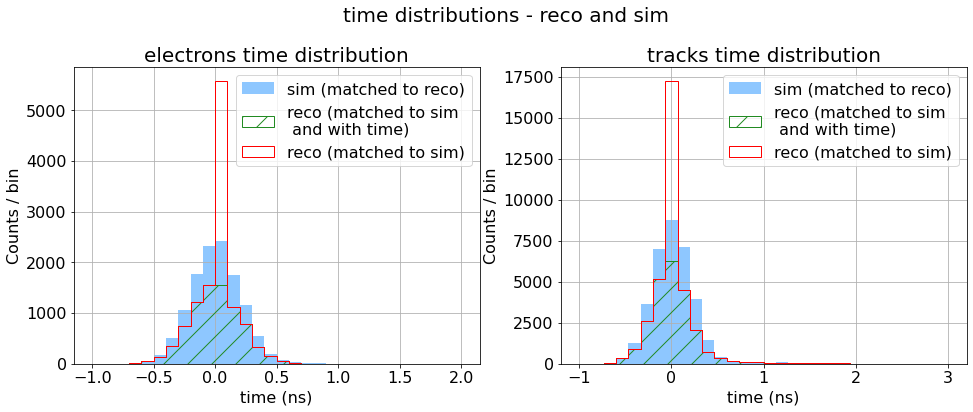

In [18]:
plt.figure(figsize=(16,12))
plt.suptitle("time distributions - reco and sim", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ak.flatten(ele_sim_time[ele_sim_time!=-1]), bins=30, color='dodgerblue', label="sim (matched to reco)", alpha=0.5, range=(-1,2))
BB = ak.flatten(ele_time[ele_sim_time!=-1])
plt.hist(BB[BB!=0], bins=30, color='forestgreen', label="reco (matched to sim\n and with time)", histtype="step", range=(-1,2), hatch='/')
plt.hist(BB, bins=30, color='red', label="reco (matched to sim)", histtype="step", range=(-1,2))
plt.title("electrons time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
plt.hist(ak.flatten(ak.flatten(track_sim_time[track_sim_time!=-1])), bins=30, color='dodgerblue', label="sim (matched to reco)", alpha=0.5, range=(-1,3))
AA = ak.flatten(ak.flatten(track_time[track_sim_time!=-1]))
plt.hist(AA[AA != 0], bins=30, color='forestgreen', label="reco (matched to sim\n and with time)", histtype="step", range=(-1,3), hatch='/')
plt.hist(ak.flatten(ak.flatten(track_time[track_sim_time!=-1])), bins=30, color='red', label="reco (matched to sim)", histtype="step", range=(-1,3))
plt.title("tracks time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

### time distribution - prompt only

In [19]:
ele_t = []
ele_t_sim = []
track_t = []
track_t_sim = []

for ev in range(len(event)):
    for ele in range(len(ele_prompt[ev])):
        if not ele_prompt[ev][ele] or ele_sim_time[ev][ele]==-1:
            continue
        ele_t.append(ele_time[ev][ele])
        ele_t_sim.append(ele_sim_time[ev][ele])
        for trk in range(len(track_pt[ev][ele])):
            if track_sim_time[ev][ele][trk]!=-1:
                track_t.append(track_time[ev][ele][trk])
                track_t_sim.append(track_sim_time[ev][ele][trk])

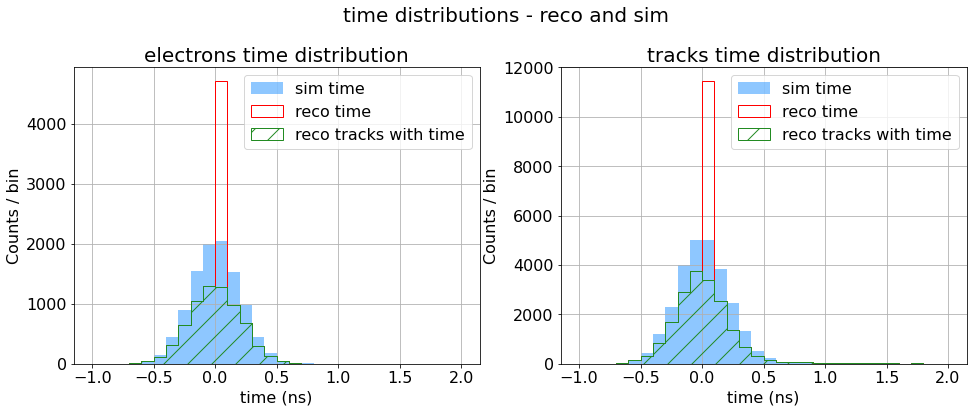

In [20]:
plt.figure(figsize=(16,12))
plt.suptitle("time distributions - reco and sim", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ele_t_sim, bins=30, color='dodgerblue', label="sim time", alpha=0.5, range=(-1,2))
plt.hist(ele_t, bins=30, color='red', label="reco time", histtype="step", range=(-1,2))
ele_t_nozero = np.array(ele_t)
plt.hist(ele_t_nozero[ele_t_nozero!=0], bins=30, color='forestgreen', label="reco tracks with time", histtype="step", range=(-1,2), hatch='/')
plt.title("electrons time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
AA = np.array(track_t_sim)
AA = AA[AA!=-1]
plt.hist(AA, bins=30, color='dodgerblue', label="sim time", alpha=0.5, range=(-1,2))
plt.hist(track_t, bins=30, color='red', label="reco time", histtype="step", range=(-1,2))
track_t_nozero = np.array(track_t)
plt.hist(track_t_nozero[track_t_nozero!=0], bins=30, color='forestgreen', label="reco tracks with time", histtype="step", range=(-1,2), hatch='/')
plt.title("tracks time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

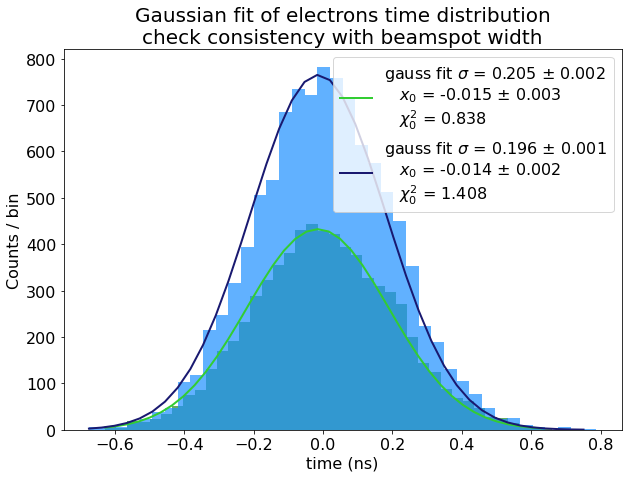

In [21]:
BINS=40

plt.figure(figsize=(10,7))

res, chi2 = gauss_fit_and_plot(ele_t_nozero[ele_t_nozero!=0], init_parms=[350,0,0.1], label="reco", colors=["limegreen","forestgreen"], bins=BINS)
res_sim, chi2_sim = gauss_fit_and_plot(ele_t_sim, init_parms=[600,0.02,0.1], label="sim", bins=BINS)

plt.title("Gaussian fit of electrons time distribution\ncheck consistency with beamspot width")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.show()

## $(t_R - t_S) / \sigma_t$

In [22]:
ELE_DZ = 0.2

In [52]:
ele_delta_t = []
track_delta_t = []

for ev in range(len(event)):
    for ele in range(len(ele_prompt[ev])):
        if (ele_dz[ev][ele]>0.5 or ele_dxy[ev][ele]>0.2):
            continue
        if not ele_prompt[ev][ele]:
            continue
        if ele_sim_time[ev][ele]!=-1 and ele_timeErr[ev][ele]>0:
            ele_delta_t.append((-ele_sim_time[ev][ele]+ele_time[ev][ele])/ele_timeErr[ev][ele])
        for trk in range(len(track_pt[ev][ele])):
            if track_mva[ev][ele][trk]<0.5:
                continue
            # cut in dz with ele, tunable
            if (track_dz_ele[ev][ele][trk] > ELE_DZ or track_PVweight[ev][ele][trk] < 0.8):
                continue
            if track_sim_time[ev][ele][trk]!=-1 and track_timeErr[ev][ele][trk]>0:
                track_delta_t.append((-track_sim_time[ev][ele][trk]+track_time[ev][ele][trk])/track_timeErr[ev][ele][trk])

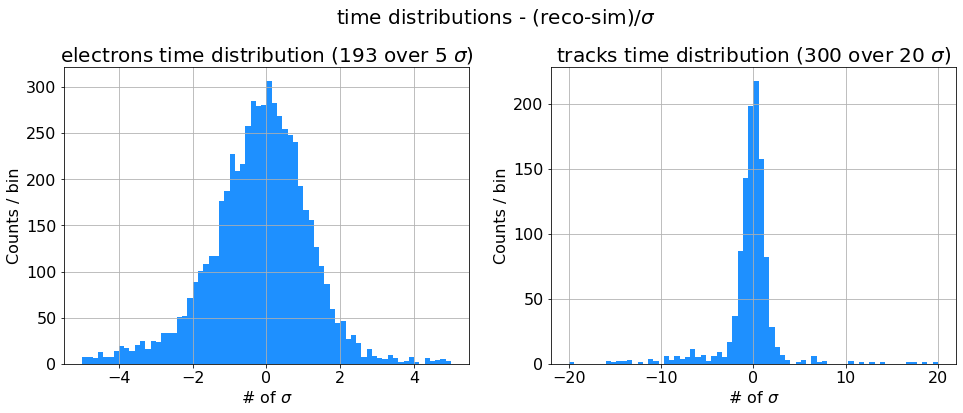

In [53]:
plt.figure(figsize=(16,12))
plt.suptitle("time distributions - (reco-sim)/$\sigma$", fontsize=20, y=0.95)

NBIN = 70

plt.subplot(221)
myhist(ele_delta_t, bins=NBIN, title="electrons time distribution (193 over 5 $\sigma$)", xlabel="# of $\sigma$", ylabel="Counts / bin", range=(-5,5))
plt.subplot(222)
myhist(track_delta_t, bins=NBIN, title="tracks time distribution (300 over 20 $\sigma$)", xlabel="# of $\sigma$", ylabel="Counts / bin", range=(-20,20))
plt.show()

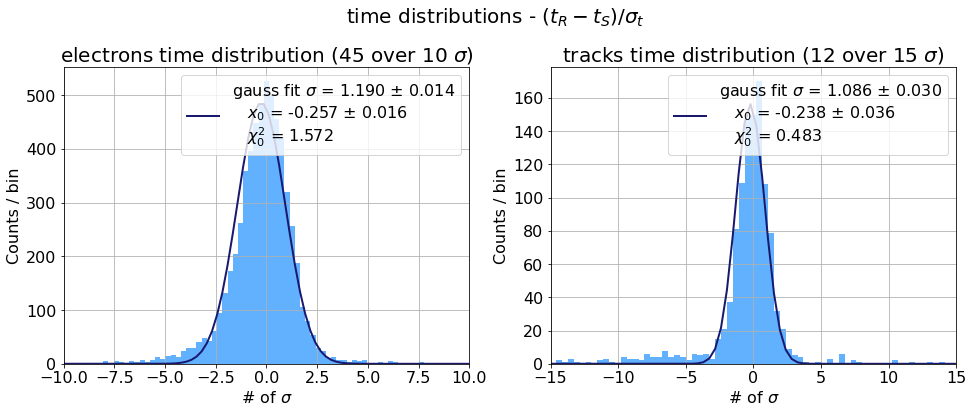

In [54]:
BINS=200

plt.figure(figsize=(16,12))
plt.suptitle("time distributions - $(t_R - t_S) / \sigma_t$", fontsize=20, y=0.95)

plt.subplot(221)
res, chi2 = gauss_fit_and_plot(ele_delta_t, init_parms=[350,0,0.1], label="ele", bins=BINS)
AA = np.array(ele_delta_t)
ot = len(AA[AA>10])+len(AA[AA<-10])

plt.title(f'electrons time distribution ({ot} over 10 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
plt.xlim(-10,10)
# plt.legend()
#plt.grid() 

plt.subplot(222)
res_sim, chi2_sim = gauss_fit_and_plot(track_delta_t, init_parms=[800,0,1], label="tracks", bins=BINS)
AA = np.array(track_delta_t)
ot = len(AA[AA>15])+len(AA[AA<-15])
#myhist(track_delta_t, bins=NBIN, title="tracks time distribution ({ot} over 20 $\sigma$)", xlabel="# of $\sigma$", ylabel="Counts / bin", range=(-20,20))
plt.title(f'tracks time distribution ({ot} over 15 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")

# plt.legend()
plt.xlim(-15,15)
#plt.grid() 

plt.show()

## dt between the prompt electrons reconstructed in the event

In [26]:
ele_dt_vtx = []
ele_dt_sim_vtx = []

for ev in range(len(event)):
    if ak.sum(ele_prompt[ev])==2:
        times_ee = (ele_time[ev])[ele_prompt[ev]]
        if len(times_ee) != 2:
            print("ERROR!! ", times_ee)
        if (times_ee[1] != 0 and times_ee[0] != 0):
            ele_dt_vtx.append(times_ee[1]-times_ee[0])
        times_sim_ee = (ele_sim_time[ev])[ele_prompt[ev]]
        if len(times_sim_ee) != 2:
            print("ERROR!! ", times_sim_ee)
        if (times_sim_ee[1] != 0 and times_sim_ee[0] != 0):
            ele_dt_sim_vtx.append(times_sim_ee[1]-times_sim_ee[0])

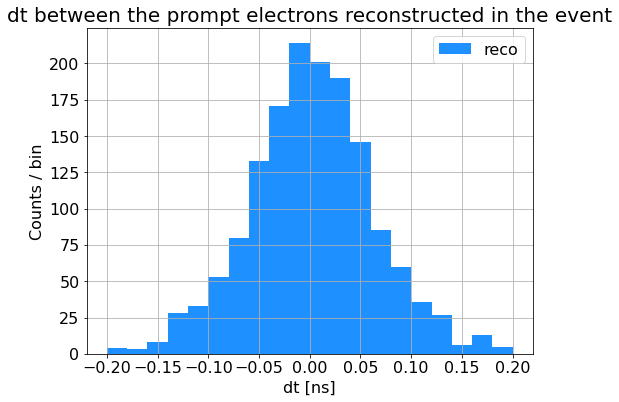

In [27]:
plt.figure(figsize=(8,6))
#range=(0,max(abs(np.array(ele_dt_vtx))))
plt.hist((np.array(ele_dt_vtx)), bins = 20, range=(-0.2,0.2), color='dodgerblue', label="reco")
#plt.hist(abs(np.array(ele_dt_sim_vtx)), bins = 20, range=(0,0.3), color='red', histtype="step", label="sim")
plt.title("dt between the prompt electrons reconstructed in the event")
plt.xlabel("dt [ns]")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend()
plt.show()

## dt between a prompt electron reconstructed in the event and the other electrons

In [28]:
ele2_dt_vtx = []
ele2_dt_sim_vtx = []
#ele_pt_all = []

for ev in range(len(ele_pt)):
    if ak.sum(ele_prompt[ev])==1:
        time_ee = (ele_time[ev])[ele_prompt[ev]]
        time_sim_ee = (ele_sim_time[ev])[ele_prompt[ev]]
        for ele_idx in range(len(ele_time[ev])):
            if not ele_prompt[ev][ele_idx]:
                if (time_ee != 0 and ele_time[ev][ele_idx] != 0):
                    ele2_dt_vtx.append((time_ee - ele_time[ev][ele_idx]).to_numpy()[0])
                if (time_sim_ee != 0 and ele_sim_time[ev][ele_idx] != 0):
                    ele2_dt_sim_vtx.append((time_sim_ee - ele_sim_time[ev][ele_idx]).to_numpy()[0])
    if ak.sum(ele_prompt[ev])==2:
        for index in range(2):
            time_ee = (ele_time[ev])[ele_prompt[ev]][index]
            time_sim_ee = (ele_sim_time[ev])[ele_prompt[ev]][index]
            for ele_idx in range(len(ele_time[ev])):
                if not ele_prompt[ev][ele_idx]:
                    if (time_ee != 0 and ele_time[ev][ele_idx] != 0):
                        ele2_dt_vtx.append((time_ee - ele_time[ev][ele_idx]))
                    if (time_sim_ee != 0 and ele_sim_time[ev][ele_idx] != 0):
                        ele2_dt_sim_vtx.append((time_sim_ee - ele_sim_time[ev][ele_idx]))

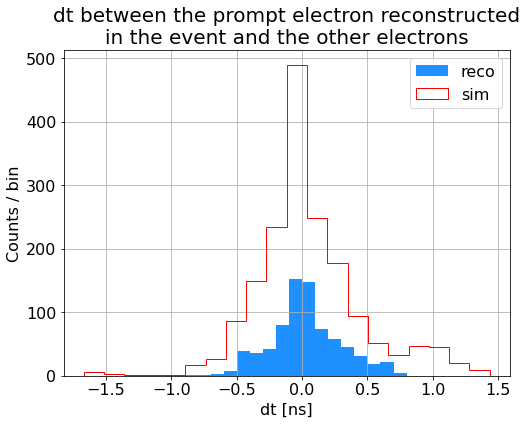

In [29]:
plt.figure(figsize=(8,6))
#range=(0,max(abs(np.array(ele_dt_vtx))))
plt.hist((np.array(ele2_dt_vtx)), bins = 20, color='dodgerblue', label="reco", range=(-1,1))
plt.hist((np.array(ele2_dt_sim_vtx)), bins = 20, color='red', histtype="step", label="sim")
plt.title("dt between the prompt electron reconstructed\nin the event and the other electrons")
plt.xlabel("dt [ns]")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend()
plt.show()

## pT, eta, phi

In [30]:
#needed until folder Zee_secondTry
# ele_pt_prompt = []
# ele_eta_prompt = []
# ele_phi_prompt = []
# for ev in range(len(event)):
#     eta_idx = -1
#     for ele_idx in range(len(ele_prompt[ev])):
#         if ele_track[ev][ele_idx]==-1:
#             continue
#         else:
#             eta_idx+=1        
#         if not ele_prompt[ev][ele_idx]:
#             continue

#         ele_pt_prompt.append(ele_pt[ev][eta_idx]) 
#         ele_eta_prompt.append(ele_eta[ev][eta_idx]) 
#         ele_phi_prompt.append(ele_phi[ev][eta_idx]) 

ele_pt_prompt = []
ele_eta_prompt = []
ele_phi_prompt = []
for ev in range(len(event)):
    for ele_idx in range(len(ele_prompt[ev])):
        if ele_track[ev][ele_idx]==-1:
            continue      
        if not ele_prompt[ev][ele_idx]:
            continue

        ele_pt_prompt.append(ele_pt[ev][ele_idx]) 
        ele_eta_prompt.append(ele_eta[ev][ele_idx]) 
        ele_phi_prompt.append(ele_phi[ev][ele_idx]) 

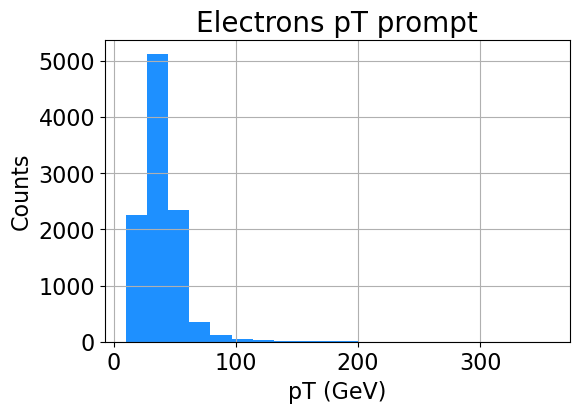

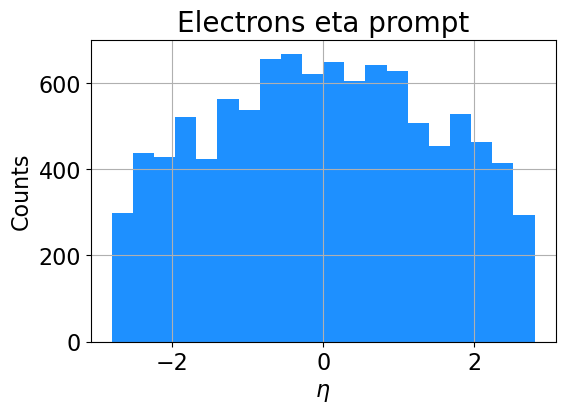

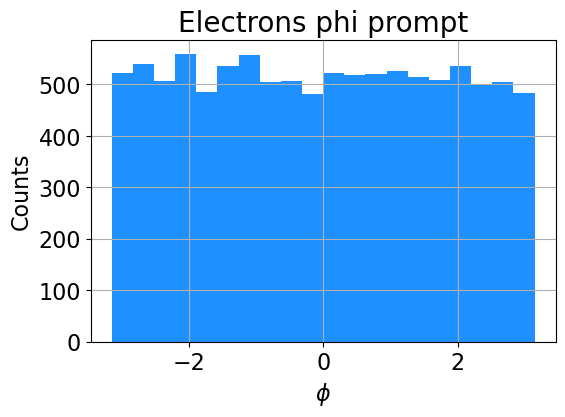

In [31]:
nphist(ele_pt_prompt, title="Electrons pT prompt", xlabel="pT (GeV)", bins = 20)
nphist(ele_eta_prompt, title="Electrons eta prompt", xlabel="$\eta$", bins = 20)
nphist(ele_phi_prompt, title="Electrons phi prompt", xlabel="$\phi$", bins = 20)

### tracks MVA

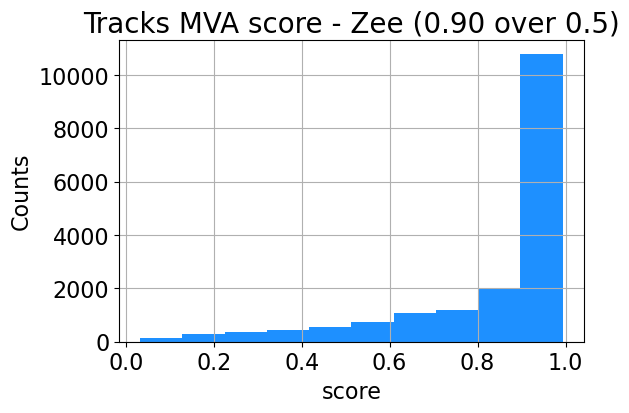

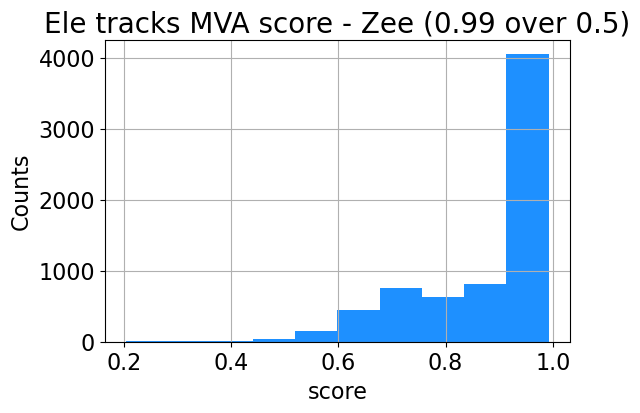

In [32]:
all_tracks_mva = ak.flatten(track_mva[ele_prompt])[ak.flatten(track_mva[ele_prompt])>0]
ele_tracks_mva = (ele_mva[ele_prompt])[(ele_mva[ele_prompt])>0]
ot = ak.count(all_tracks_mva[all_tracks_mva>0.5])
All = ak.count(all_tracks_mva)
hist(all_tracks_mva, title=f'Tracks MVA score - Zee ({ot/All:.2f} over 0.5)', xlabel="score", bins = 10)
ot = ak.count(ele_tracks_mva[ele_tracks_mva>0.5])
All = ak.count(ele_tracks_mva)
hist(ele_tracks_mva, title=f'Ele tracks MVA score - Zee ({ot/All:.2f} over 0.5)', xlabel="score", bins = 10)

## dt w/ vtx VS dt w/ ele

In [33]:
dt_trk_ele = []
dt_trk_vtx = []

for ev in range(len(ele_prompt)):
    for ele in range(len(ele_prompt[ev])):
        if (ele_prompt[ev][ele]):
            for trk in range(len(track_dt_ele[ev][ele])):
                dt_trk_ele.append(track_dt_ele[ev][ele][trk])
                dt_trk_vtx.append(track_dt_vtx[ev][ele][trk])

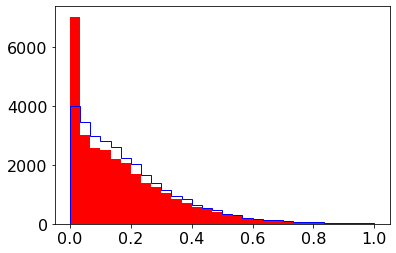

In [34]:
ran=(0,1)
plt.hist(dt_trk_ele, bins=30, color="r", range=ran)
plt.hist(dt_trk_vtx, bins=30, color="b", histtype="step", range=ran)
plt.show()

## efficiency on tracks with time

In [35]:
time_ele_B, all_ele_B, time_track_B, all_track_B = track_efficiency(ele_prompt, ele_track, ele_sim_pt, ele_dz, ele_dxy, ele_barrel, ele_time, ele_timeErr, 
                                                                    track_sim_pt, track_dz_ele, track_time, track_timeErr)
time_ele_E, all_ele_E, time_track_E, all_track_E = track_efficiency(ele_prompt, ele_track, ele_sim_pt, ele_dz, ele_dxy, ele_barrel, ele_time, ele_timeErr, 
                                                                    track_sim_pt, track_dz_ele, track_time, track_timeErr,
                                                                    BARREL=False)

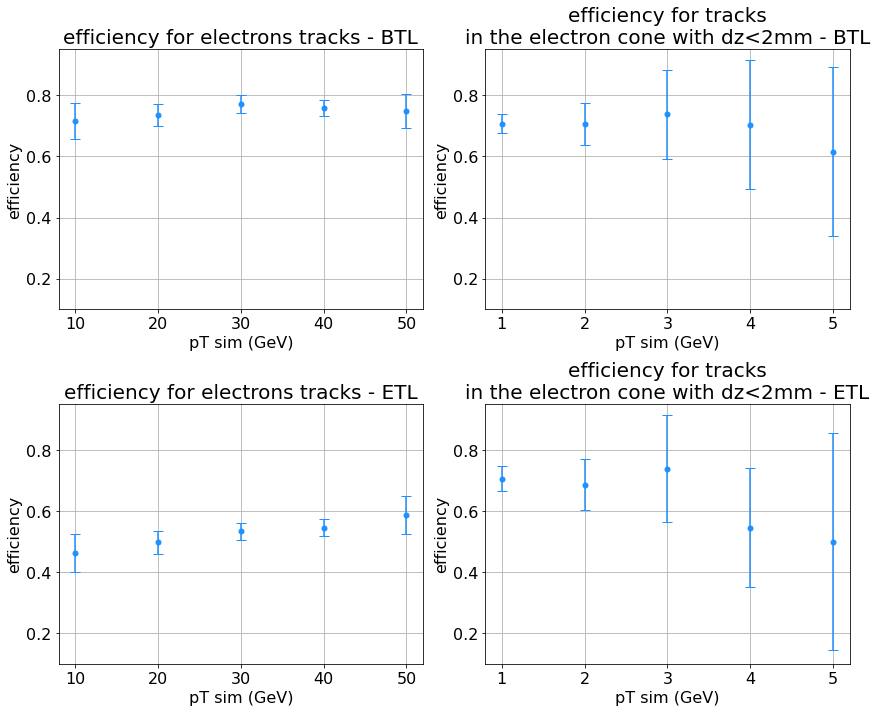

In [36]:
fig = plt.figure(figsize=(12,10))
#plt.suptitle("efficiency of time assignment to tracks", fontsize=20, y=0.97)

bins=np.array([10,20,30,40,50,60])
track_eff_plot(bins, all_ele_E, time_ele_E, title="efficiency for electrons tracks - ETL", pos=223)
plt.ylim(0.1,0.95)
plt.grid()

bins=np.array([1,2,3,4,5,6])
track_eff_plot(bins, all_track_E, time_track_E, title="efficiency for tracks\nin the electron cone with dz<2mm - ETL", pos=224)
plt.ylim(0.1,0.95)
plt.grid()

bins=np.array([10,20,30,40,50,60])
track_eff_plot(bins, all_ele_B, time_ele_B, title="efficiency for electrons tracks - BTL", pos=221)
plt.ylim(0.1,0.95)
plt.grid()

bins=np.array([1,2,3,4,5,6])
track_eff_plot(bins, all_track_B, time_track_B, title="efficiency for tracks\nin the electron cone with dz<2mm - BTL", pos=222)
plt.ylim(0.1,0.95)

plt.grid()

fig.tight_layout()
plt.show()

## dt distribution

In [37]:
ele_dt_B = []
ele_dt_E = []

for ev in range(len(event)):
    for ele_idx in range(len(ele_prompt[ev])):
        # check sulla trackref (se -1 skip)
        if (ele_track[ev][ele_idx]==-1):
            continue
        
        pt = ele_pt[ev][ele_idx]
        # cut on dxy, dz wrt to the PV
        if (ele_dz[ev][ele_idx]>0.5 or ele_dxy[ev][ele_idx]>0.2):
            continue
        # if prompt -> signal, if not -> bkg (here selecting only prompt)
        if not ele_prompt[ev][ele_idx]:
            continue
   
        # loop over tracks
        for trk_idx in range(len(track_pt[ev][ele_idx])):
            # cut in dr, deta
            #if (track_dr[ev][ele_idx][trk_idx] < 0.01 or track_dr[ev][ele_idx][trk_idx] > 0.3 or track_deta[ev][ele_idx][trk_idx] < 0.01):
            #    continue
            # cut in dz con ele, provare diversi valori
            if (track_dz_ele[ev][ele_idx][trk_idx] > 0.2):
                continue
      
            trTime  = track_sim_time[ev][ele_idx][trk_idx]
            eleTime = ele_sim_time[ev][ele_idx]
            if (trTime > -1 and eleTime > -1):
                if ele_barrel[ev][ele_idx]:
                    ele_dt_B.append(abs(trTime-eleTime))
                else:
                    ele_dt_E.append(abs(trTime-eleTime))
            else:
                if ele_barrel[ev][ele_idx]:
                    ele_dt_B.append(-99)
                else:
                    ele_dt_E.append(-99)  
                    
ele_reco_dt_B = []
ele_reco_dt_E = []
ele_reco_dt_matched_B = []
ele_reco_dt_matched_E = []
for ev in range(len(event)):
    for ele_idx in range(len(ele_prompt[ev])):
        # check sulla trackref (se -1 skip)
        if (ele_track[ev][ele_idx]==-1):
            continue
        
        pt = ele_pt[ev][ele_idx]
        # cut on dxy, dz wrt to the PV
        if (ele_dz[ev][ele_idx]>0.5 or ele_dxy[ev][ele_idx]>0.2):
            continue
        # if prompt -> signal, if not -> bkg (here selecting only prompt)
        if not ele_prompt[ev][ele_idx]:
            continue
   
        # loop over tracks
        for trk_idx in range(len(track_pt[ev][ele_idx])):
            # cut in dr, deta
            #if (track_dr[ev][ele_idx][trk_idx] < 0.01 or track_dr[ev][ele_idx][trk_idx] > 0.3 or track_deta[ev][ele_idx][trk_idx] < 0.01):
            #    continue
            # cut in dz con ele, provare diversi valori
            if (track_dz_ele[ev][ele_idx][trk_idx] > 0.2):
                continue
      
            trTime  = track_time[ev][ele_idx][trk_idx]
            eleTime = ele_time[ev][ele_idx]
      
            trTimeErr  = track_timeErr[ev][ele_idx][trk_idx]
            eleTimeErr = ele_timeErr[ev][ele_idx]
            if (trTimeErr != -1 and eleTimeErr != -1):
                if ele_barrel[ev][ele_idx]:
                    ele_reco_dt_B.append(abs(trTime-eleTime))
                else:
                    ele_reco_dt_E.append(abs(trTime-eleTime))
            else:
                if ele_barrel[ev][ele_idx]:
                    ele_reco_dt_B.append(-99)
                else:
                    ele_reco_dt_E.append(-99)  
            trSimTime  = track_sim_time[ev][ele_idx][trk_idx]
            eleSimTime = ele_sim_time[ev][ele_idx]
            if (trTimeErr != -1 and eleTimeErr != -1 and trSimTime>-1 and eleSimTime>-1):
                if ele_barrel[ev][ele_idx]:
                    ele_reco_dt_matched_B.append(abs(trTime-eleTime))
                else:
                    ele_reco_dt_matched_E.append(abs(trTime-eleTime))
            else:
                if ele_barrel[ev][ele_idx]:
                    ele_reco_dt_matched_B.append(-99)
                else:
                    ele_reco_dt_matched_E.append(-99)  

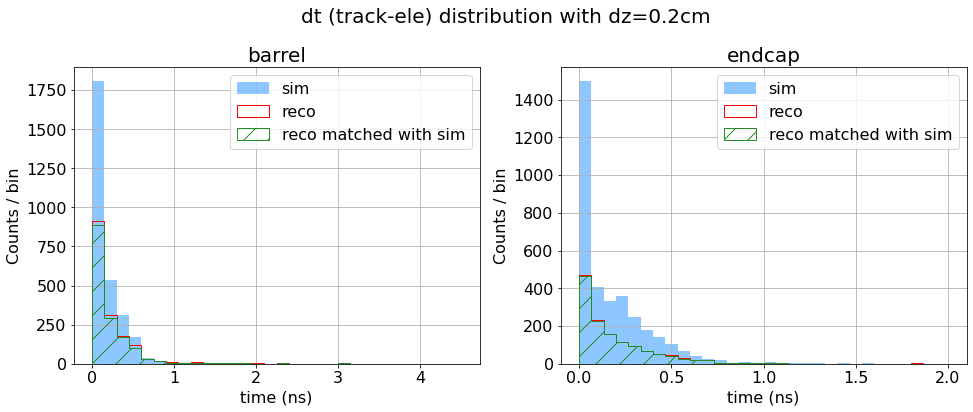

In [38]:
ele_dt_B=np.array(ele_dt_B)
ele_dt_E=np.array(ele_dt_E)
ele_reco_dt_B=np.array(ele_reco_dt_B)
ele_reco_dt_E=np.array(ele_reco_dt_E)

bins=30

plt.figure(figsize=(16,12))
plt.suptitle("dt (track-ele) distribution with dz=0.2cm", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ele_dt_B[ele_dt_B>-90], bins=30, color='dodgerblue', label="sim", alpha=0.5, range=(0,4.5))
plt.hist(ele_reco_dt_B, bins=bins, color='red', label="reco", histtype="step", range=(0,4.5))
plt.hist(ele_reco_dt_matched_B, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=(0,4.5), hatch="/")
plt.title("barrel")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
plt.hist(ele_dt_E[ele_dt_E>-90], bins=bins, color='dodgerblue', label="sim", alpha=0.5, range=(0,2))
plt.hist(ele_reco_dt_E, bins=bins, color='red', label="reco", histtype="step", range=(0,2))
plt.hist(ele_reco_dt_matched_E, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=(0,2), hatch="/")
plt.title("endcap")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

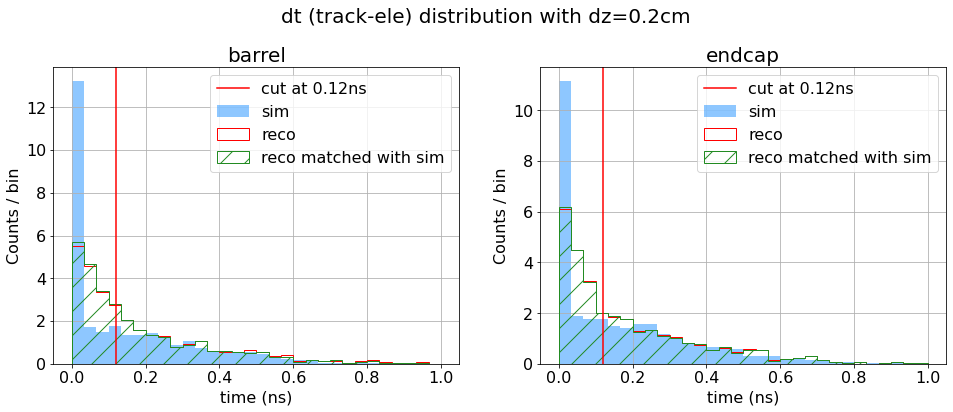

In [39]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("dt (track-ele) distribution with dz=0.2cm", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ele_dt_B[ele_dt_B>-90], bins=30, color='dodgerblue', label="sim", alpha=0.5, range=(0,1), density=True)
plt.hist(ele_reco_dt_B, bins=bins, color='red', label="reco", histtype="step", range=(0,1), density=True)
plt.hist(ele_reco_dt_matched_B, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=(0,1), hatch="/", density=True)
plt.axvline(0.12, color="red", label="cut at 0.12ns")
plt.title("barrel")
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
plt.hist(ele_dt_E[ele_dt_E>-90], bins=bins, color='dodgerblue', label="sim", alpha=0.5, range=(0,1), density=True)
plt.hist(ele_reco_dt_E, bins=bins, color='red', label="reco", histtype="step", range=(0,1), density=True)
plt.hist(ele_reco_dt_matched_E, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=(0,1), hatch="/", density=True)
plt.axvline(0.12, color="red", label="cut at 0.12ns")
plt.title("endcap")
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

In [40]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                                                                     track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ELE_DZ=0.2)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], ele_time[~ele_barrel], ele_timeErr[~ele_barrel], 
                                                                     track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], ELE_DZ=0.2)

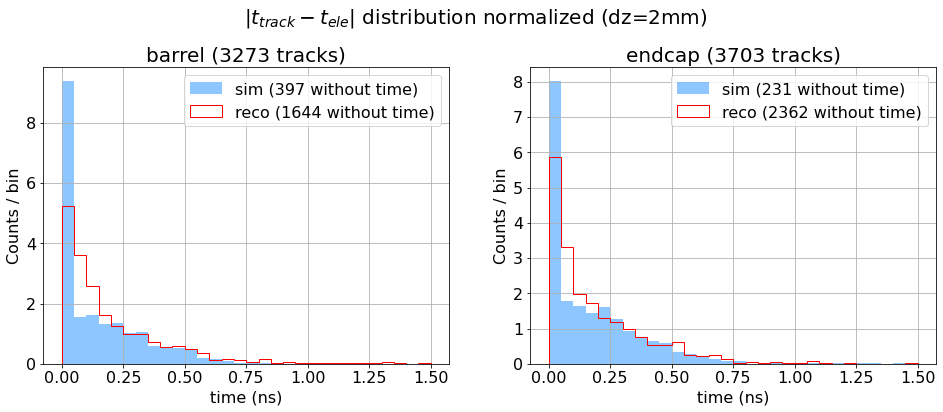

In [41]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{ele}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
#plt.hist(ele_reco_dt_matched_B, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=ran, hatch="/", density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
#plt.hist(np.zeros(noreco_E), bins=bins, range=ran, color="green", histtype="step")
#plt.hist(ele_reco_dt_matched_E, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=ran, hatch="/", density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

## dt distribution for a given dz - RECO

In [42]:
ele_dt_B = []
ele_dt_E = []
ele_dt_sigma_B = []
ele_dt_sigma_E = []

ELE_DZ = 0.2
MVA_CUT = 0.5

for ev in range(len(event)):
    for ele_idx in range(len(ele_prompt[ev])):
        # check sulla trackref (se -1 skip)
        if (ele_track[ev][ele_idx]==-1):
            continue
        
        pt = ele_pt[ev][ele_idx]
        # cut on dxy, dz wrt to the PV
        if (ele_dz[ev][ele_idx]>0.5 or ele_dxy[ev][ele_idx]>0.2):
            continue
        # if prompt -> signal, if not -> bkg (here selecting only prompt)
        if not ele_prompt[ev][ele_idx]:
            continue

        # loop over tracks
        for trk_idx in range(len(track_pt[ev][ele_idx])):
            # cut in dr, deta
            #if (track_dr[ev][ele_idx][trk_idx] < 0.01 or track_dr[ev][ele_idx][trk_idx] > 0.3 or track_deta[ev][ele_idx][trk_idx] < 0.01):
            #    continue
            # cut in dz con ele, provare diversi valori
            if (track_dz_ele[ev][ele_idx][trk_idx] > ELE_DZ):
                continue

            trTime  = track_time[ev][ele_idx][trk_idx]
            trErr   = track_timeErr[ev][ele_idx][trk_idx]
            eleTime = ele_time[ev][ele_idx]
            eleErr  = ele_timeErr[ev][ele_idx]
            # CUT ON MVA
            if (track_mva[ev][ele_idx][trk_idx] < MVA_CUT):
                trErr = -1
            if (ele_mva[ev][ele_idx] < MVA_CUT):
                eleErr = -1
            # cut on time, provare diversi valori -> calcolo dt e soglia, check sugli errori
            if (trErr > 0 and eleErr > 0):
                dt = abs(trTime-eleTime)
                sigma = (trErr**2+eleErr**2)**0.5
                dt_in_sigma = dt/sigma
                if ele_barrel[ev][ele_idx]:
                    ele_dt_B.append(dt)
                    ele_dt_sigma_B.append(dt_in_sigma)
                else:
                    ele_dt_E.append(dt)
                    ele_dt_sigma_E.append(dt_in_sigma)
            else:
                if ele_barrel[ev][ele_idx]:
                    ele_dt_B.append(-1)
                    ele_dt_sigma_B.append(-1)
                else:
                    ele_dt_E.append(-1)
                    ele_dt_sigma_E.append(-1)

In [43]:
ele_dt_B = np.array(ele_dt_B)
ele_dt_E = np.array(ele_dt_E)
ele_dt_sigma_B = np.array(ele_dt_sigma_B)
ele_dt_sigma_E = np.array(ele_dt_sigma_E)

ele_dt_B = ele_dt_B[ele_dt_B!=-1]
ele_dt_E = ele_dt_E[ele_dt_E!=-1]
ele_dt_sigma_B = ele_dt_sigma_B[ele_dt_sigma_B!=-1]
ele_dt_sigma_E = ele_dt_sigma_E[ele_dt_sigma_E!=-1]

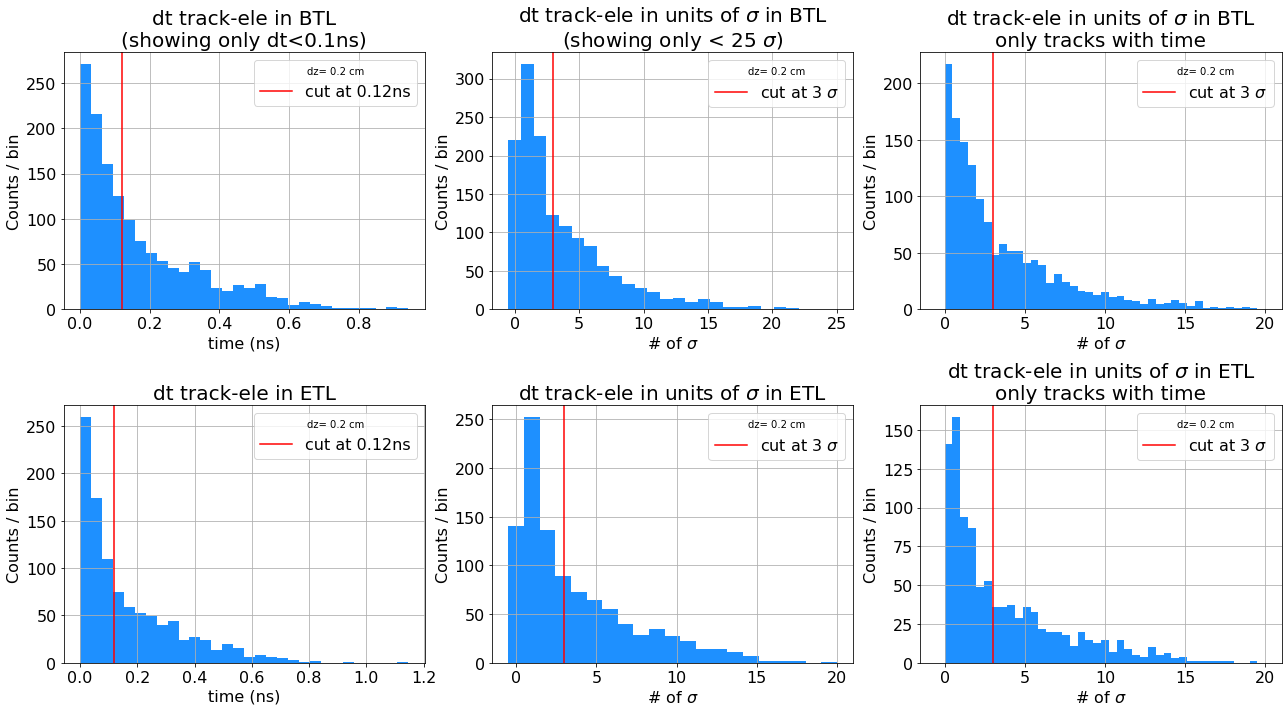

In [44]:
fig = plt.figure(figsize=(18,10))

plt.subplot(231)
myhist(ele_dt_B[ele_dt_B<1], title="dt track-ele in BTL\n(showing only dt<0.1ns)")
plt.axvline(0.12, color="red", label="cut at 0.12ns")
plt.legend(title="dz= "+str(ELE_DZ)+" cm")

plt.subplot(234)
myhist(ele_dt_E, title="dt track-ele in ETL")
plt.axvline(0.12, color="red", label="cut at 0.12ns")
plt.legend(title="dz= "+str(ELE_DZ)+" cm")

plt.subplot(232)
myhist(ele_dt_sigma_B[np.where(ele_dt_sigma_B<25)[0]], title="dt track-ele in units of $\sigma$ in BTL\n(showing only < 25 $\sigma$)", xlabel= "# of $\sigma$", range=(-0.5,25), bins=26)
plt.axvline(3, color="red", label="cut at 3 $\sigma$")
plt.legend(title="dz= "+str(ELE_DZ)+" cm")

plt.subplot(235)
myhist(ele_dt_sigma_E, title="dt track-ele in units of $\sigma$ in ETL", xlabel= "# of $\sigma$", range=(-0.5,20), bins=21)
plt.axvline(3, color="red", label="cut at 3 $\sigma$")
plt.legend(title="dz= "+str(ELE_DZ)+" cm")

plt.subplot(236)
myhist(ele_dt_sigma_E[ele_dt_sigma_E>0], title="dt track-ele in units of $\sigma$ in ETL\nonly tracks with time", xlabel= "# of $\sigma$", range=(-0.5,20), bins=42)
plt.axvline(3, color="red", label="cut at 3 $\sigma$")
plt.legend(title="dz= "+str(ELE_DZ)+" cm")

plt.subplot(233)
myhist(ele_dt_sigma_B[ele_dt_sigma_B>0], title="dt track-ele in units of $\sigma$ in BTL\nonly tracks with time", xlabel= "# of $\sigma$", range=(-0.5,20), bins=42)
plt.axvline(3, color="red", label="cut at 3 $\sigma$")
plt.legend(title="dz= "+str(ELE_DZ)+" cm")

fig.tight_layout()
plt.show()

## dt distribution with the vertex

In [49]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = vertex_dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], 
                                                                    vertex_time, vertex_timeErr, track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], 
                                                                    track_timeErr[ele_barrel], ELE_DZ=0.2, SIGNAL=True)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = vertex_dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], 
                                                                    vertex_time, vertex_timeErr, track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], 
                                                                    track_timeErr[~ele_barrel], ELE_DZ=0.2, SIGNAL=True)

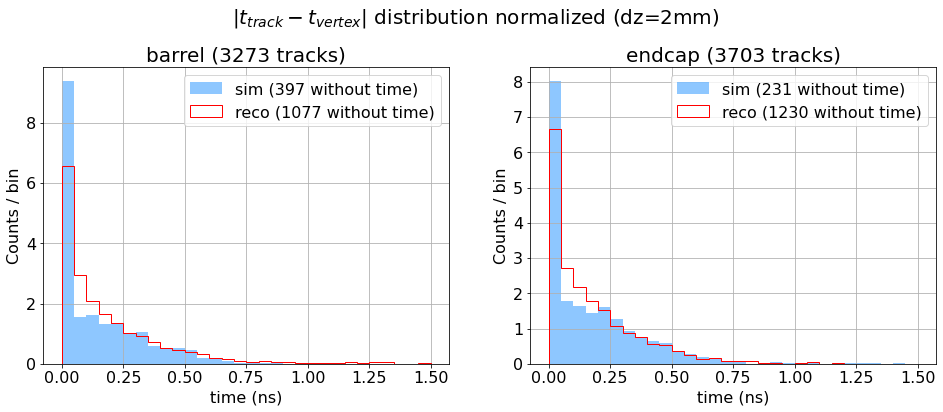

In [50]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{vertex}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()